In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
import zipfile as zf

files = zf.ZipFile(r'C:\project\Flowers-Dataset.zip')
files.extractall()
files.close()

In [6]:
cd C:\project

C:\project


In [7]:
ls

 Volume in drive C is Don't use me
 Volume Serial Number is 2E56-C876

 Directory of C:\project

02-11-2022  12:18    <DIR>          .
02-11-2022  11:19       235,663,188 Flowers-Dataset.zip
               1 File(s)    235,663,188 bytes
               1 Dir(s)  108,081,295,360 bytes free


In [8]:
import glob
import zipfile

In [9]:
files = glob.glob('C:\project\Flowers-Dataset.zip')

In [10]:
files

['C:\\project\\Flowers-Dataset.zip']

In [11]:
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data/raw')

Unzipping: C:\project\Flowers-Dataset.zip


In [12]:
file

'C:\\project\\Flowers-Dataset.zip'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen= ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip =True,vertical_flip =False)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
x_train = train = train_datagen.flow_from_directory(r'C:\project\data\raw\flowers\daisy',target_size = (10,10),class_mode ='categorical',batch_size=10)

Found 0 images belonging to 0 classes.


In [18]:
x_train.class_indices

{}

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [21]:
model= Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) 

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [27]:
model.add(Dense(4,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
len(x_train)

0

In [30]:
1238/24

51.583333333333336

In [31]:
ls

 Volume in drive C is Don't use me
 Volume Serial Number is 2E56-C876

 Directory of C:\project

02-11-2022  12:22    <DIR>          .
02-11-2022  12:22    <DIR>          data
02-11-2022  11:19       235,663,188 Flowers-Dataset.zip
               1 File(s)    235,663,188 bytes
               2 Dir(s)  106,184,495,104 bytes free


In [32]:
model.save('flower.h5')

In [33]:
ls

 Volume in drive C is Don't use me
 Volume Serial Number is 2E56-C876

 Directory of C:\project

02-11-2022  12:30    <DIR>          .
02-11-2022  12:22    <DIR>          data
02-11-2022  12:30        37,110,944 flower.h5
02-11-2022  11:19       235,663,188 Flowers-Dataset.zip
               2 File(s)    272,774,132 bytes
               2 Dir(s)  106,145,517,568 bytes free


In [34]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
odel = load_model('flower.h5')

In [36]:
pwd

'C:\\project'

In [37]:
img = image.load_img(r'C:\project\data\raw\flowers\daisy\2045022175_ad087f5f60_n.jpg')

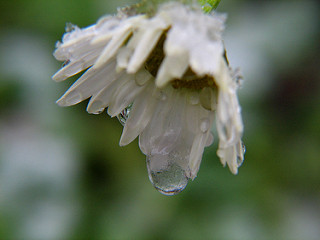

In [38]:
img

In [39]:
img = image.load_img(r'C:\project\data\raw\flowers\daisy\2045022175_ad087f5f60_n.jpg',target_size=(64,64))

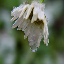

In [40]:
img

In [41]:
x=image.img_to_array(img)

In [42]:
x

array([[[ 40.,  57.,  12.],
        [ 42.,  59.,  14.],
        [ 41.,  64.,  12.],
        ...,
        [ 62.,  74.,  64.],
        [ 53.,  66.,  59.],
        [ 44.,  50.,  46.]],

       [[ 38.,  53.,  10.],
        [ 42.,  57.,  14.],
        [ 45.,  62.,  17.],
        ...,
        [ 69.,  82.,  75.],
        [ 60.,  73.,  66.],
        [ 47.,  60.,  53.]],

       [[ 38.,  53.,  12.],
        [ 41.,  58.,  16.],
        [ 44.,  63.,  17.],
        ...,
        [ 73.,  88.,  81.],
        [ 61.,  77.,  67.],
        [ 51.,  64.,  57.]],

       ...,

       [[ 66.,  99.,  44.],
        [ 68.,  99.,  55.],
        [ 73., 103.,  69.],
        ...,
        [126., 136., 135.],
        [123., 131., 133.],
        [117., 125., 127.]],

       [[ 62.,  95.,  38.],
        [ 65.,  98.,  51.],
        [ 73., 103.,  67.],
        ...,
        [126., 136., 135.],
        [124., 132., 134.],
        [118., 126., 129.]],

       [[ 62.,  91.,  37.],
        [ 60.,  97.,  46.],
        [ 75., 1

In [43]:
x.shape

(64, 64, 3)

In [44]:
x=np.expand_dims(x,axis=0)

In [45]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 6s 6s/step


In [47]:
y

array([0], dtype=int64)

In [48]:
x_train.class_indices

{}

In [49]:
{}
index = ['daisy','dandelion','rose','sunflower','tulip']

In [50]:
index[y[-1]]

'daisy'

In [51]:
index[1]

'dandelion'